# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [17]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv, dotenv_values
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ikili\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
#load .env environment variables
path_to_env=r"C:\Users\ikili\OneDrive\Desktop\week 12 HW\Starter_Code\.env"
load_dotenv(path_to_env)

True

In [19]:
print(load_dotenv())

True


In [20]:
env_values=dotenv_values(path_to_env)

In [21]:
print(path_to_env)

C:\Users\ikili\OneDrive\Desktop\week 12 HW\Starter_Code\.env


In [22]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv("api_key")
len(api_key)

32

In [23]:
#print(api_key)

ddef8b0684e142829d8161885c4e7c5a


In [24]:
print(load_dotenv())

True


In [26]:
#print(env_values['api_key'])

In [27]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [28]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin AND Bitcoin AND BTC ",
    language="en",
    page_size=50,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about bitcoin: 1742


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Corin Faife',
 'title': 'Crypto.com admits over $30 million stolen by hackers',
 'description': 'Cryptocurrency exchange Crypto.com has said that $15 million in ethereum and $18 million in bitcoin were stolen by hackers in a security breach',
 'url': 'https://www.theverge.com/2022/1/20/22892958/crypto-com-exchange-hack-bitcoin-ethereum-security',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/mde_l3lUC4muDPEFG7LYrUz0O3g=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8921023/acastro_bitcoin_2.jpg',
 'publishedAt': '2022-01-20T13:23:31Z',
 'content': 'In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars]'}

In [29]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_headlines = newsapi.get_everything(
    q="ethereum AND Ethereum AND ETH",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about enthereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles about enthereum: 852


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Corin Faife',
 'title': 'Crypto.com admits over $30 million stolen by hackers',
 'description': 'Cryptocurrency exchange Crypto.com has said that $15 million in ethereum and $18 million in bitcoin were stolen by hackers in a security breach',
 'url': 'https://www.theverge.com/2022/1/20/22892958/crypto-com-exchange-hack-bitcoin-ethereum-security',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/mde_l3lUC4muDPEFG7LYrUz0O3g=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8921023/acastro_bitcoin_2.jpg',
 'publishedAt': '2022-01-20T13:23:31Z',
 'content': 'In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars]'}

In [30]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2022-01-20T13:23:31Z,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000
1,2022-01-20T11:05:19Z,"In an interview with Bloomberg TV, Crypto.com'...",0.1027,0.046,0.000,0.954
2,2022-01-14T13:45:00Z,"LONDON, Jan 14 (Reuters) - Kazakhstan may no l...",-0.3400,0.000,0.093,0.907
3,2022-02-09T12:34:33Z,Bitcoin billionaire Mike Novogratz has said th...,0.4767,0.148,0.075,0.776
4,2022-01-26T22:46:32Z,Investing in crypto is a risky business partic...,0.1779,0.075,0.054,0.871


In [31]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2022-01-20,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000
1,2022-01-20,"In an interview with Bloomberg TV, Crypto.com'...",0.1027,0.046,0.000,0.954
2,2022-02-03,"Online thieves made off with ""wrapped ethereum...",0.1027,0.131,0.092,0.778
3,2022-02-03,"Online thieves made off with 120,000 wEth, or ...",-0.6808,0.051,0.174,0.775
4,2022-01-19,The crypto market's whiplash volatility can ma...,0.5574,0.129,0.000,0.871


In [32]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,compound,positive,negative,neutral
count,50.000000,50.000000,50.000000,50.0000
mean,0.120956,0.073280,0.043840,0.8829
std,0.416699,0.065298,0.059768,0.0824
min,-0.802000,0.000000,0.000000,0.6740
25%,0.000000,0.000000,0.000000,0.8265
50%,0.089950,0.075500,0.000000,0.8775
75%,0.416600,0.122000,0.069500,0.9450
max,0.902200,0.246000,0.204000,1.0000


In [33]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.153967,0.084250,0.046630,0.869120
std,0.432394,0.072732,0.065923,0.097689
min,-0.765000,0.000000,0.000000,0.596000
25%,-0.052050,0.000000,0.000000,0.801000
50%,0.177900,0.078000,0.000000,0.873000
75%,0.526700,0.131000,0.091250,0.938250
max,0.858800,0.309000,0.232000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin.

Q: Which coin had the highest compound score?

A: Bitcoin.

Q. Which coin had the highest positive score?

A: Ethereum.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [34]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [35]:
# Expand the default stopwords list if necessary
sw_addon = {'going', 'youve'}

In [36]:
# Instantiate the lemmatizer
# YOUR CODE HERE!

# Create a list of stopwords
# YOUR CODE HERE!

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [37]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""

    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # tokenization
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Remove the stop words
    # Convert the words to lowercase
    sw = set(stopwords.words('english'))
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]

    return tokens

In [38]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens']=[tokenizer(word) for word in bitcoin_df['text']]
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-01-20T13:23:31Z,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000,"[new, blog, post, company, said, eth, bitcoin,..."
1,2022-01-20T11:05:19Z,"In an interview with Bloomberg TV, Crypto.com'...",0.1027,0.046,0.000,0.954,"[interview, bloomberg, tv, cryptocoms, chief, ..."
2,2022-01-14T13:45:00Z,"LONDON, Jan 14 (Reuters) - Kazakhstan may no l...",-0.3400,0.000,0.093,0.907,"[london, jan, reuters, kazakhstan, may, longer..."
3,2022-02-09T12:34:33Z,Bitcoin billionaire Mike Novogratz has said th...,0.4767,0.148,0.075,0.776,"[bitcoin, billionaire, mike, novogratz, ha, sa..."
4,2022-01-26T22:46:32Z,Investing in crypto is a risky business partic...,0.1779,0.075,0.054,0.871,"[investing, crypto, risky, business, particula..."


In [39]:
# Create a new tokens column for Ethereum
ethereum_df['tokens']=[tokenizer(word) for word in ethereum_df['text']]
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-01-20,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000,"[new, blog, post, company, said, eth, bitcoin,..."
1,2022-01-20,"In an interview with Bloomberg TV, Crypto.com'...",0.1027,0.046,0.000,0.954,"[interview, bloomberg, tv, cryptocoms, chief, ..."
2,2022-02-03,"Online thieves made off with ""wrapped ethereum...",0.1027,0.131,0.092,0.778,"[online, thief, made, wrapped, ethereum, worth..."
3,2022-02-03,"Online thieves made off with 120,000 wEth, or ...",-0.6808,0.051,0.174,0.775,"[online, thief, made, weth, wrapped, ethereum,..."
4,2022-01-19,The crypto market's whiplash volatility can ma...,0.5574,0.129,0.000,0.871,"[crypto, market, whiplash, volatilitycan, make..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [40]:
from collections import Counter
from nltk import ngrams

In [41]:
bitcoin_df['text']

0     In a new blog post the company said that 4,836...
1     In an interview with Bloomberg TV, Crypto.com'...
2     LONDON, Jan 14 (Reuters) - Kazakhstan may no l...
3     Bitcoin billionaire Mike Novogratz has said th...
4     Investing in crypto is a risky business partic...
5     I show how price manipulation to liquidate tra...
6     Every Bitcoin transaction is stored in the dis...
7     Today I counted no fewer than 14 individuals d...
8     Bitcoin rose above $44,000 briefly on Monday, ...
9     When can something bad also be used for good? ...
10    Note: This is not investment advice and my inv...
11    Just two months ago, Bitcoin and global crypto...
12    The European Union urgently needs to ban a for...
13    Coinbase launched the first in a series of pay...
14    Two New York-based "tech entrepreneurs" were a...
15    Francis Ngannou has just announced on Twitter ...
16    Big Technology— by Alex Kantrowitz\r\nRevealin...
17    Cryptocurrency exchange platform FTX is sl

In [42]:
# Generate the Bitcoin N-grams where N=2
bitcoin_text_all = []
for token in bitcoin_df['tokens']:
    for text in token:
        bitcoin_text_all.append(text)
bitcoin_bigram_counts = Counter(ngrams(bitcoin_text_all, n=2))
bitcoin_bigram_counts.most_common(10)

[(('char', 'bitcoin'), 6),
 (('market', 'cap'), 4),
 (('global', 'crypto'), 3),
 (('cryptocurrency', 'market'), 3),
 (('super', 'bowl'), 3),
 (('blog', 'post'), 2),
 (('transaction', 'char'), 2),
 (('crypto', 'mining'), 2),
 (('char', 'two'), 2),
 (('two', 'month'), 2)]

In [43]:
# Generate the Ethereum N-grams where N=2
ethereum_text_all = []
for token in ethereum_df['tokens']:
    for text in token:
        ethereum_text_all.append(text)
ethereum_bigram_counts = Counter(ngrams(ethereum_text_all, n=2))
ethereum_bigram_counts.most_common(10)

[(('char', 'ethereum'), 7),
 (('crypto', 'market'), 6),
 (('cryptocurrency', 'market'), 6),
 (('char', 'cryptocom'), 4),
 (('secondmost', 'valuable'), 4),
 (('valuable', 'cryptocurrency'), 4),
 (('char', 'world'), 4),
 (('ether', 'eth'), 4),
 (('ethereumcrypto', 'eth'), 4),
 (('worth', 'nearly'), 3)]

In [44]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [45]:
# Use token_count to get the top 10 words for Bitcoin
token_count(bitcoin_text_all)

[('char', 50), ('bitcoin', 32), ('crypto', 13)]

In [46]:
# Use token_count to get the top 10 words for Ethereum
token_count(ethereum_text_all)

[('char', 99), ('ethereum', 35), ('cryptocurrency', 28)]

In [50]:
pip install WordCloud

  Using cached wordcloud-1.8.1-cp37-cp37m-win_amd64.whl (154 kB)
Note: you may need to restart the kernel to use updated packages.


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [52]:
def listToString(s):    
    # initialize an empty string 
    str1 = " " 
    # return string   
    return (str1.join(s))

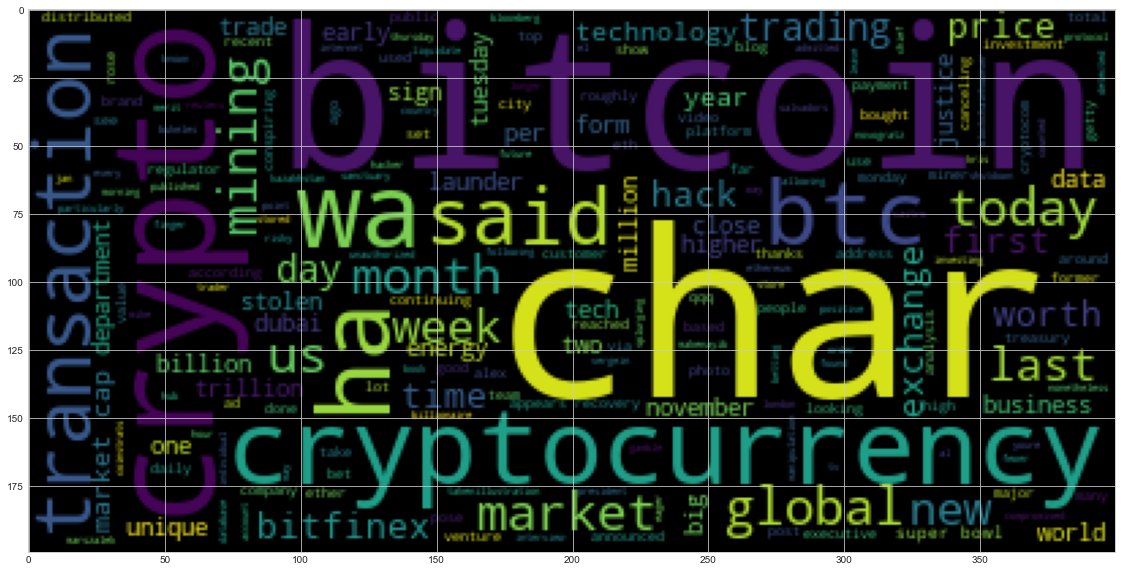

In [53]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(listToString(bitcoin_text_all))
plt.imshow(wc)

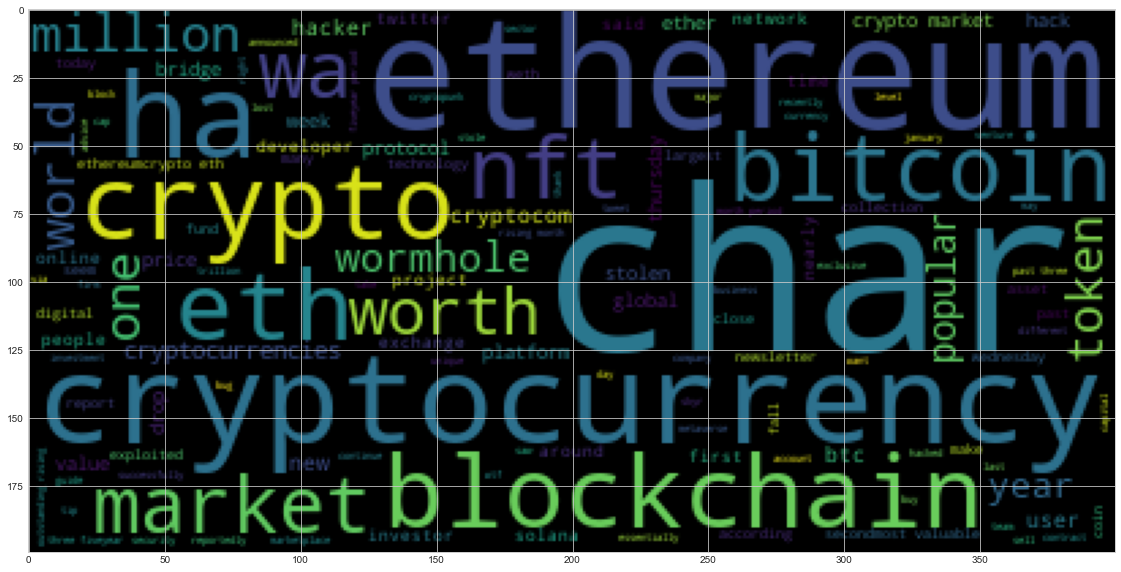

In [54]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(listToString(ethereum_text_all))
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [56]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [57]:
import spacy
from spacy import displacy

In [60]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [61]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [62]:
# Concatenate all of the Bitcoin text together
bitcoin_big_string = listToString(bitcoin_df['text'])

In [63]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_big_string)
# Add a title to the document
bitcoin_doc.user_data['title'] = 'Bitcoin NER'

In [64]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [65]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text, ent.label_)

4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
Verge ORG
the early hours TIME
Thursday DATE
morning TIME
Bloomberg TV ORG
Crypto.com ORG
Kris Marszalek PERSON
400 CARDINAL
LONDON GPE
Jan 14 DATE
Reuters ORG
Kazakhstan GPE
Mike Novogratz PERSON
$3.6 billion MONEY
2016 DATE
Bitfinex ORG
El Salvadors ORG
Nayib Bukeles PERSON
Coinstrats PRODUCT
Bitcoin PERSON
Ethereum PERSON
registrar info ORG
roughly $200k MONEY
above $44,000 MONEY
Monday DATE
the end of last week DATE
the weekend DATE
50-day DATE
Monday DATE
first ORDINAL
Ali Khan PERSON
Just two months ago DATE
1 CARDINAL
nearly $68,000 MONEY
$1.27 trillion MONEY
The European Union ORG
Wednesd ORG
Coinbase PERSON
first ORDINAL
US GPE
Two CARDINAL
New York GPE
Tuesday DATE
4.5bn MONEY
the US Department of Justice ORG
Francis Ngannou PERSON
Twitter PRODUCT
half CARDINAL
270 CARDINAL
Bitcoin PERSON
The Predator WORK_OF_ART
Ciryl Gane PERSON
Alex Kantrowitz PERSON
Amazon ORG
Apple ORG
Micros ORG
FTX ORG
Super Bowl EVENT
Super Bowl E

---

### Ethereum NER

In [66]:
# Concatenate all of the Ethereum text together
ethereum_big_string = listToString(ethereum_df['text'])

In [67]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_big_string)
# Add a title to the document
ethereum_doc.user_data['title'] = 'Ethereum NER'

In [68]:
# Render the visualization

displacy.render(ethereum_doc, style='ent')

In [69]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text, ent.label_)

4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
Verge ORG
the early hours TIME
Thursday DATE
morning TIME
Bloomberg TV ORG
Crypto.com ORG
Kris Marszalek PERSON
400 CARDINAL
nearly $324 million MONEY
Getty Images PERSON
more than $324 million MONEY
Wormhole PERSON
120,000 CARDINAL
wEth ORG
Ethereum ORG
nearly $324 million MONEY
Getty Images PERSON
more than $324 million MONEY
Wormhole PERSON
Twitter PRODUCT
weeks DATE
at least one CARDINAL
January 1st DATE
2022 DATE
the past day DATE
TIME ORG
weekly DATE
Vita ORG
Wormhole PERSON
$322 million MONEY
Solana PERSON
Ac ORG
Crypto.com ORG
Singapore GPE
nearly $15m MONEY
Ethereum GPE
the weekend DATE
The Color Museum ORG
NFT ORG
Blockchain LOC
2022 DATE
Ethereum ORG
second ORDINAL
Bitcoin PERSON
Thousands CARDINAL
every day DATE
Ethereum PERSON
registrar info ORG
roughly $200k MONEY
ETH ORG
ETH ORG
Crypto.com ORG
two CARDINAL
Thursday DATE
night TIME
crypto PERSON
WTF ORG
more than $1 million MONEY
Wednesday DATE
RIP Medical Debt ORG
Mo

---